In [2]:
print("Projekt wykonali:\n- Kamil Skałbania\n- Paweł Wypych\n- Miłosz Gronowski")

Projekt wykonali:
- Kamil Skałbania
- Paweł Wypych
- Miłosz Gronowski


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t, norm, chi2
from sklearn.utils import resample

data = pd.read_csv("song_data.csv")

print(data.columns)

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')


In [4]:
data.info()
data.describe()

print("Dane pochodzą z platformy muzycznej Spotify, zawierają informacje o cechach akustycznych i popularności utworów.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB
Dane pochodzą z platformy muzy

In [5]:
data.head(50)

song_name  song_popularity  song_duration_ms  \
0              Boulevard of Broken Dreams               73            262333   
1                              In The End               66            216933   
2                       Seven Nation Army               76            231733   
3                              By The Way               74            216933   
4                       How You Remind Me               56            223826   
5                        Bring Me To Life               80            235893   
6                             Last Resort               81            199893   
7                Are You Gonna Be My Girl               76            213800   
8                          Mr. Brightside               80            222586   
9                             Sex on Fire               81            203346   
10                             The Middle               78            168253   
11                                   Numb               63            185586   
12                        Smooth Criminal               75            209266   
13                             Can't Stop               81            269000   
14                             Chop Suey!               69            210240   
15                            Take Me Out               77            237026   
16                             I Miss You               71            227240   
17                            Best of You               62            256600   
18             I Write Sins Not Tragedies               77            187613   
19                             Kryptonite               79            233933   
20                     The Kill (Bury Me)               69            231533   
21                           Use Somebody               79            230760   
22                           No One Knows               13            255066   
23                            Jerk It Out               62            195666   
24                               Uprising               77            304840   
25                      Hey There Delilah               79            232533   
26                                 Blurry               28            303920   
27                         American Idiot               78            176346   
28            Welcome to the Black Parade               77            311106   
29                         Gives You Hell               71            213106   
30                            All My Life               11            262733   
31                           Like a Stone               77            293960   
32                       It's Been Awhile               65            264706   
33            I Hate Everything About You               75            231480   
34             Rollin' (Air Raid Vehicle)               74            213760   
35                                Fat Lip               74            178266   
36                          The Pretender               11            269373   
37                                 Savior               73            242280   
38                                 Bodies               74            201960   
39                 Sugar, We're Goin Down               79            229093   
40                              Last Nite               70            193373   
41                          Through Glass               60            282946   
42     The Diary of Jane - Single Version               69            200546   
43                 Down With the Sickness               73            279213   
44                     Wish You Were Here               62            212733   
45                    Youth Of The Nation               72            256240   
46                                Vertigo               57            194520   
47                            Miss Murder               71            206586   
48  I Bet You Look Good On The Dancefloor               63            173680   
49                    Steady, As

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

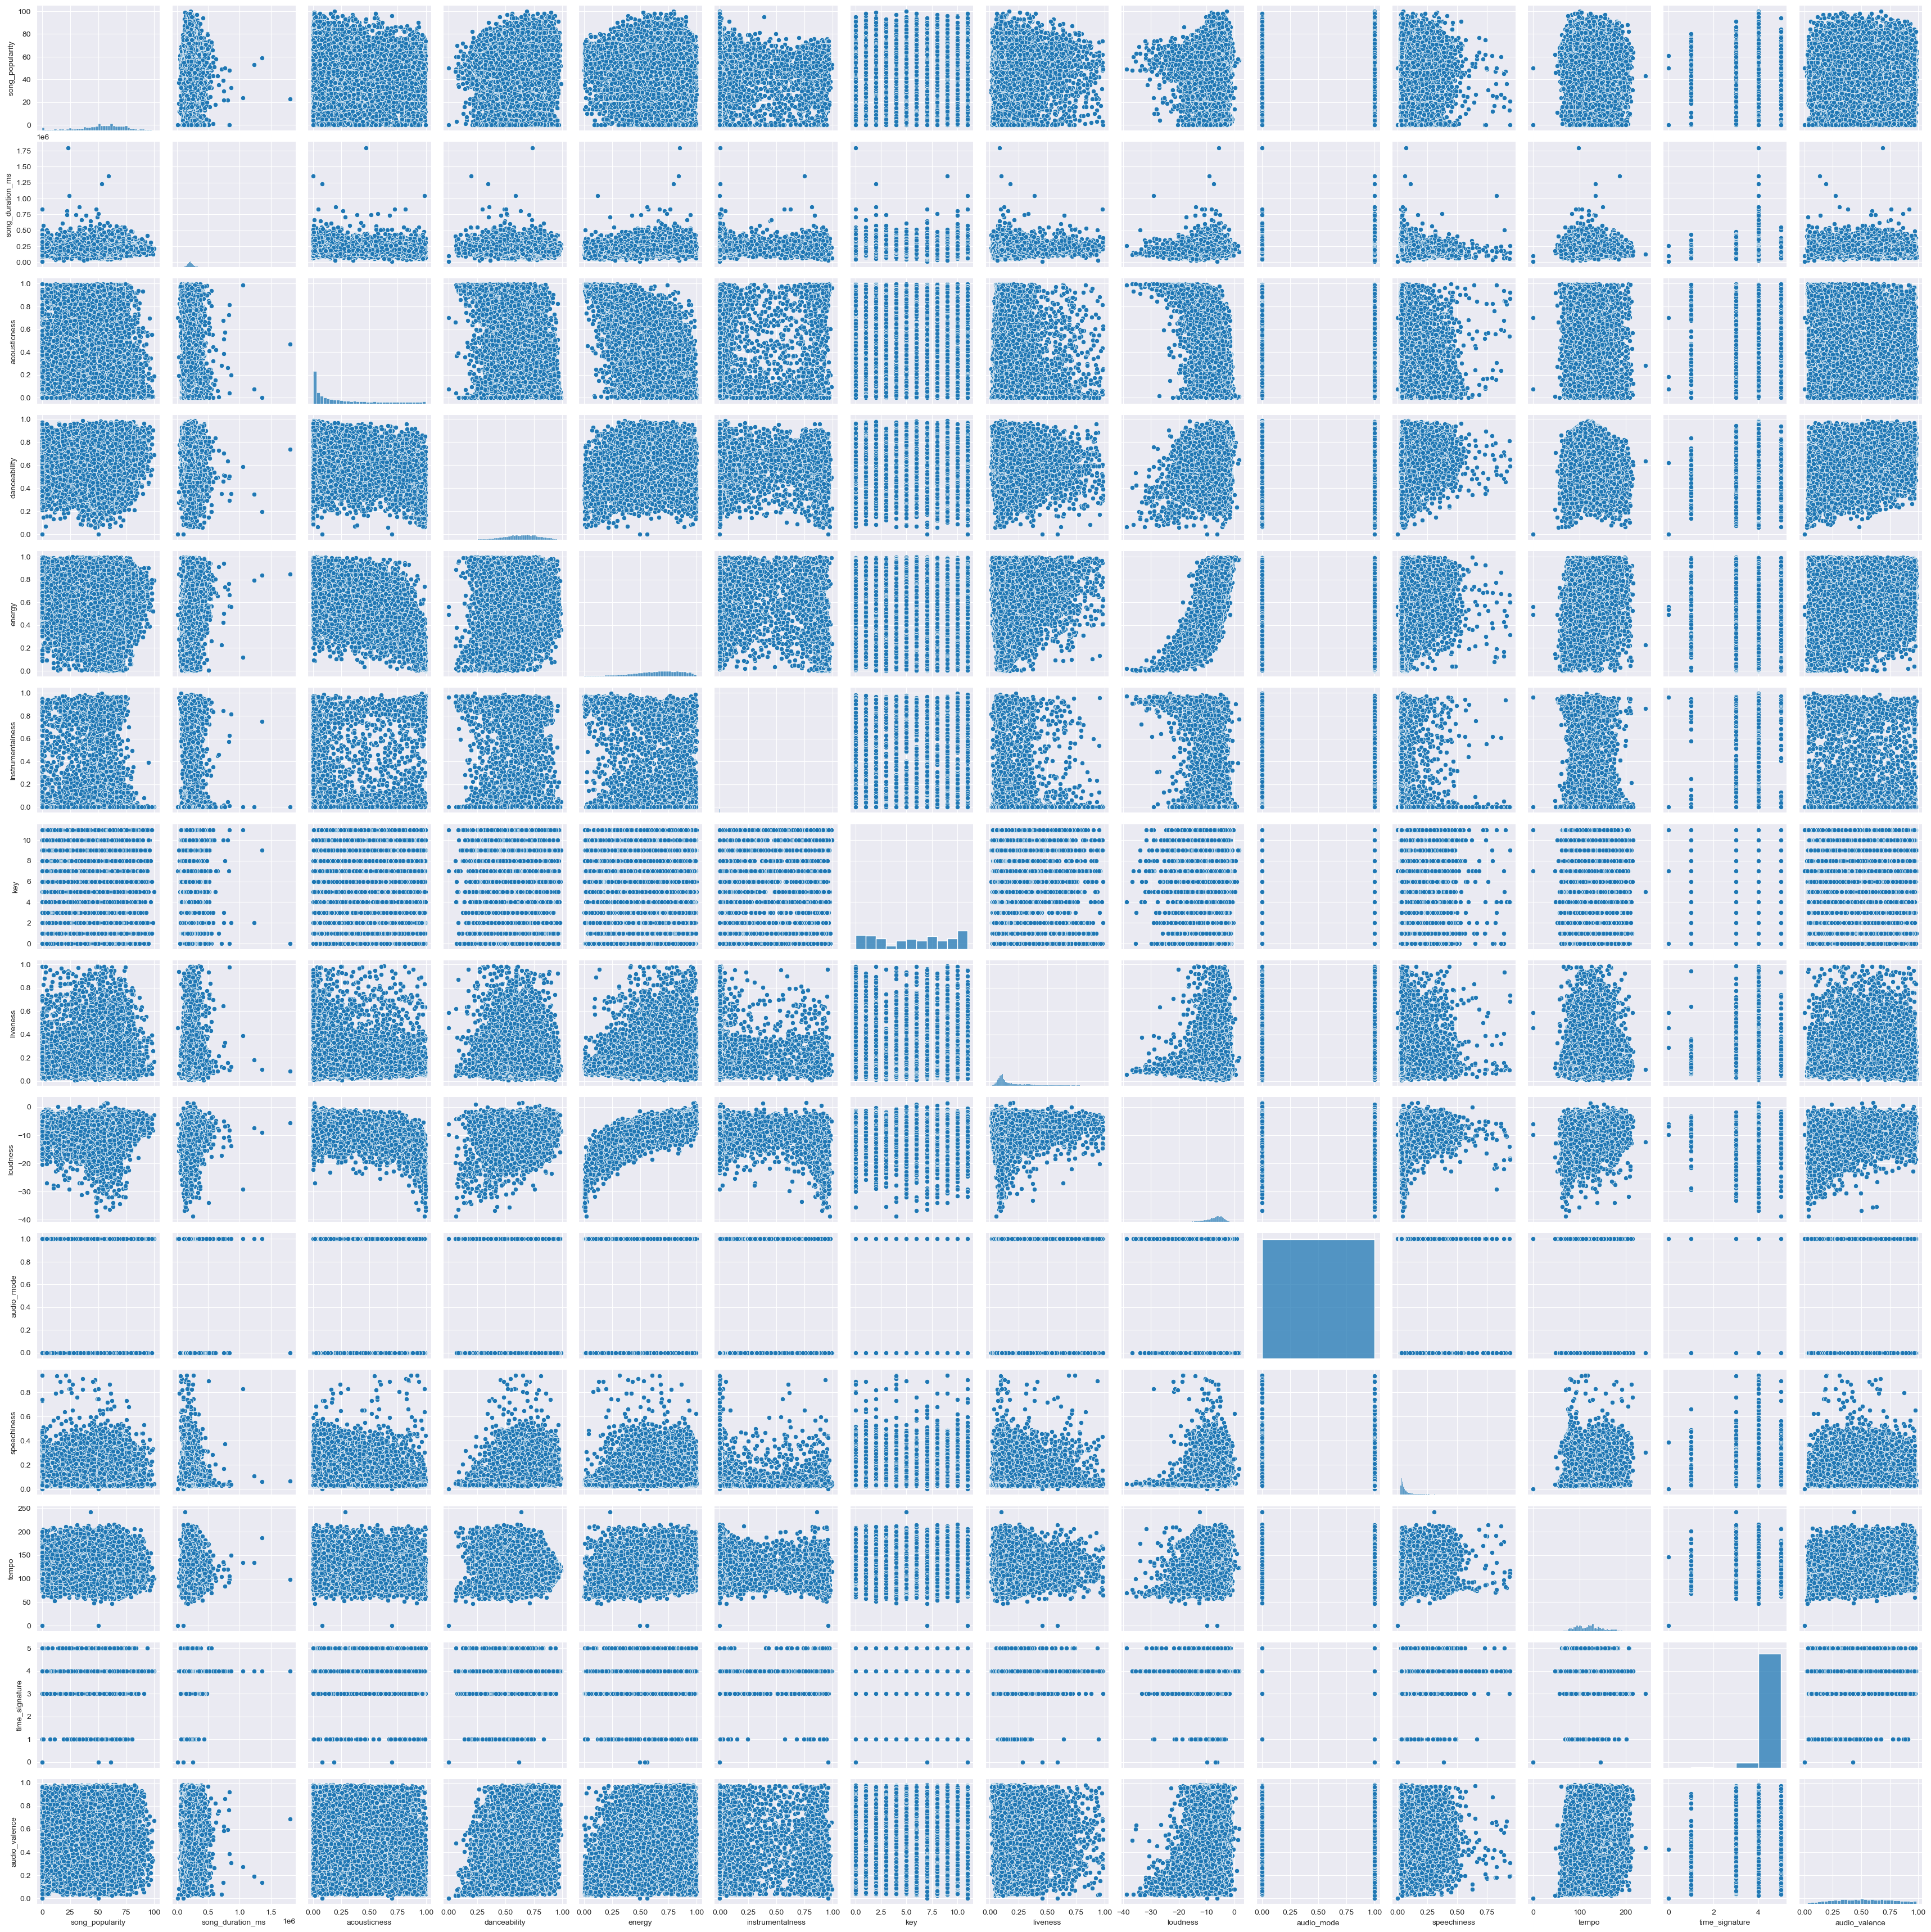

In [6]:
sns.pairplot(data)

In [7]:
# Estymacja punktowa

numeric_cols = data.select_dtypes(include=np.number).columns
stats_summary = pd.DataFrame(index=numeric_cols)

stats_summary["Średnia"] = data[numeric_cols].mean()
stats_summary["Mediana"] = data[numeric_cols].median()
stats_summary["Moda"] = data[numeric_cols].mode().iloc[0]
stats_summary["Odchylenie std"] = data[numeric_cols].std()
stats_summary["Odchylenie przeciętne"] = data[numeric_cols].apply(lambda x: np.mean(np.abs(x - x.mean())))
stats_summary["Wariancja"] = data[numeric_cols].var()
stats_summary["Kurtoza"] = data[numeric_cols].kurt()
stats_summary["Skośność"] = data[numeric_cols].skew()
stats_summary["IQR"] = data[numeric_cols].quantile(0.75) - data[numeric_cols].quantile(0.25)
stats_summary["25%"] = data[numeric_cols].quantile(0.25)
stats_summary["75%"] = data[numeric_cols].quantile(0.75)
# porównanie między grupami( audio mode) w stosunku do acousticness   + projekty w formie pdf
display(stats_summary)


Średnia        Mediana         Moda  Odchylenie std  \
song_popularity       52.991877      56.000000      58.0000       21.905654   
song_duration_ms  218211.587576  211306.000000  165000.0000    59887.540566   
acousticness           0.258539       0.132000       0.1300        0.288719   
danceability           0.633348       0.645000       0.6870        0.156723   
energy                 0.644995       0.674000       0.7040        0.214101   
instrumentalness       0.078008       0.000011       0.0000        0.221591   
key                    5.289196       5.000000       0.0000        3.614595   
liveness               0.179650       0.122000       0.1080        0.143984   
loudness              -7.447435      -6.555000      -4.5890        3.827831   
audio_mode             0.628139       1.000000       1.0000        0.483314   
speechiness            0.102099       0.055500       0.0337        0.104378   
tempo                121.073154     120.013000     125.9780       28.714456   
time_signature         3.959119       4.000000       4.0000        0.298533   
audio_valence          0.527967       0.527000       0.9610        0.244632   

                  Odchylenie przeciętne     Wariancja    Kurtoza  Skośność  \
song_popularity               17.405513  4.798577e+02  -0.169104 -0.501487   
song_duration_ms           40663.192412  3.586518e+09  46.708949  3.257477   
acousticness                   0.239466  8.335861e-02  -0.096276  1.071164   
danceability                   0.126212  2.456201e-02  -0.074797 -0.391719   
energy                         0.174042  4.583913e-02  -0.137875 -0.620738   
instrumentalness               0.129948  4.910240e-02   7.563664  2.985176   
key                            3.164517  1.306529e+01  -1.311466 -0.002520   
liveness                       0.103522  2.073144e-02   5.789919  2.215423   
loudness                       2.769083  1.465229e+01   6.522480 -1.929511   
audio_mode                     0.467161  2.335928e-01  -1.718956 -0.530308   
speechiness                    0.075313  1.089487e-02   6.504977  2.271018   
tempo                         23.155769  8.245200e+02  -0.217517  0.442855   
time_signature                 0.102823  8.912187e-02  45.554328 -4.979342   
audio_valence                  0.207113  5.984466e-02  -0.977670 -0.016423   

                          IQR          25%           75%  
song_popularity      29.00000      40.0000      69.00000  
song_duration_ms  58504.50000  184339.5000  242844.00000  
acousticness          0.39990       0.0241       0.42400  
danceability          0.21500       0.5330       0.74800  
energy                0.30500       0.5100       0.81500  
instrumentalness      0.00257       0.0000       0.00257  
key                   6.00000       2.0000       8.00000  
liveness              0.12810       0.0929       0.22100  
loudness              4.13600      -9.0440      -4.90800  
audio_mode            1.00000       0.0000       1.00000  
speechiness           0.08120       0.0378       0.11900  
tempo                41.56300      98.3680     139.93100  
time_signature        0.00000       4.0000       4.00000  
audio_valence         0.39000       0.3350       0.72500

In [8]:
# porównanie między grupami( audio mode) w stosunku do acousticness

acousticness_by_mode = data.groupby("audio_mode")["acousticness"].describe()
display(acousticness_by_mode)

print("Utwory w audio_mode = 1 są generalnie bardziej akustyczne niż te w audio_mode = 0, zarówno średnio, jak i w całym rozkładzie. Różnica nie jest ogromna, ale widoczna.")

count      mean       std       min       25%    50%      75%  \
audio_mode                                                                    
0            7004.0  0.234486  0.269475  0.000003  0.024575  0.118  0.36025   
1           11831.0  0.272778  0.298629  0.000001  0.023800  0.145  0.46250   

              max  
audio_mode         
0           0.996  
1           0.996

Utwory w audio_mode = 1 są generalnie bardziej akustyczne niż te w audio_mode = 0, zarówno średnio, jak i w całym rozkładzie. Różnica nie jest ogromna, ale widoczna.


In [10]:
# 4. Estymacja przedziałowa (średnia i wariancja)
confidence = 0.95
sample = data["song_popularity"].dropna()
n = len(sample)
mean = sample.mean()
std = sample.std(ddof=1)

# Przedział ufności dla średniej
t_crit = t.ppf((1 + confidence) / 2, df=n-1)
ci_mean = (mean - t_crit * std/np.sqrt(n), mean + t_crit * std/np.sqrt(n))

# Przedział ufności dla wariancji
chi2_lower = chi2.ppf((1 - confidence) / 2, df=n-1)
chi2_upper = chi2.ppf((1 + confidence) / 2, df=n-1)
ci_var = ((n - 1) * std**2 / chi2_upper, (n - 1) * std**2 / chi2_lower)
print(f"")

print(f"Przedział ufności dla rozkładu t-studenta (średnia): ({float(ci_mean[0]):.3f}, {float(ci_mean[1]):.3f})")
print(f"Przedział ufności dla rozkładu chi2 (wariancja): ({float(ci_var[0]):.3f}, {float(ci_var[1]):.3f})")

# Estymacja bootstrap dla średniej
boot_means = [resample(sample).mean() for _ in range(1000)]
ci_bootstrap = np.percentile(boot_means, [2.5, 97.5])

print(f"Przedział bootstrap dla średniej: {ci_bootstrap}\n")

print("Z 95% pewnością (czyli poziom ufności = 0.95) prawdziwa średnia w całej populacji leży gdzieś między 52.679 a 53.305.Użyto tu rozkładu t-Studenta, ponieważ: \n- Nie znamy prawdziwego odchylenia standardowego populacji,\n- Mamy skończoną próbę (n), więc uwzględnia się większą niepewność.\n")

print("Z 95% pewnością prawdziwa wariancja w populacji (czyli rozproszenie danych) mieści się w tym zakresie (470.311, 489.699). Wariancję oszacowano za pomocą rozkładu chi-kwadrat, bo tak się postępuje przy nieznanej średniej populacji. Wariancja jest dość duża, co oznacza, że popularność piosenek jest mocno zróżnicowana.\n")

print("Bootstrap - Z 95% pewnością, prawdziwa średnia leży między 52.677 a 53.333, ale: Ten przedział nie zakłada żadnego konkretnego rozkładu (jak t-Studenta), Jest często bardziej elastyczny i odporny na odstępstwa od normalności.")


Przedział ufności dla rozkładu t-studenta (średnia): (52.679, 53.305)
Przedział ufności dla rozkładu chi2 (wariancja): (470.311, 489.699)
Przedział bootstrap dla średniej: [52.70308734 53.31458986]

Z 95% pewnością (czyli poziom ufności = 0.95) prawdziwa średnia w całej populacji leży gdzieś między 52.679 a 53.305.Użyto tu rozkładu t-Studenta, ponieważ: 
- Nie znamy prawdziwego odchylenia standardowego populacji,
- Mamy skończoną próbę (n), więc uwzględnia się większą niepewność.

Z 95% pewnością prawdziwa wariancja w populacji (czyli rozproszenie danych) mieści się w tym zakresie (470.311, 489.699). Wariancję oszacowano za pomocą rozkładu chi-kwadrat, bo tak się postępuje przy nieznanej średniej populacji. Wariancja jest dość duża, co oznacza, że popularność piosenek jest mocno zróżnicowana.

Bootstrap - Z 95% pewnością, prawdziwa średnia leży między 52.677 a 53.333, ale: Ten przedział nie zakłada żadnego konkretnego rozkładu (jak t-Studenta), Jest często bardziej elastyczny i odporn

Histogram pokazuje liczbę obserwacji w przedziałach wartości. KDE (linia) estymuje rozkład prawdopodobieństwa.
Q-Q plot porównuje kwantyle danych do kwantyli rozkładu normalnego. Jeśli punkty układają się wzdłuż prostej → dane mają rozkład zbliżony do normalnego.
Boxplot - Mediana (środkowa linia), Rozstęp międzykwartylowy (IQR) (pudełko),Wartości odstające (kropki poza wąsami).



C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


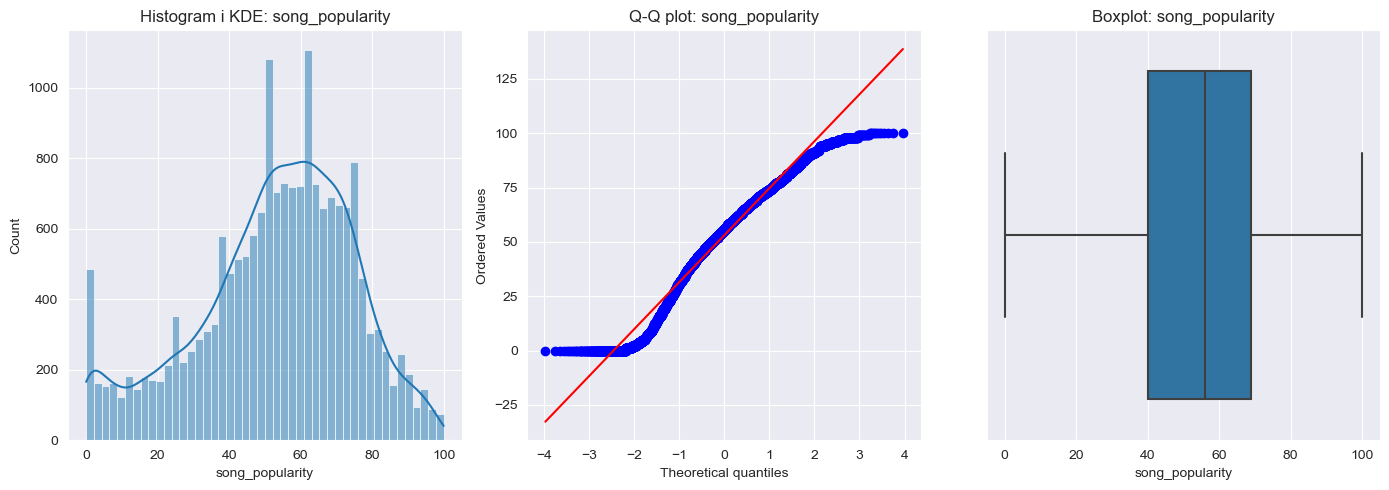

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


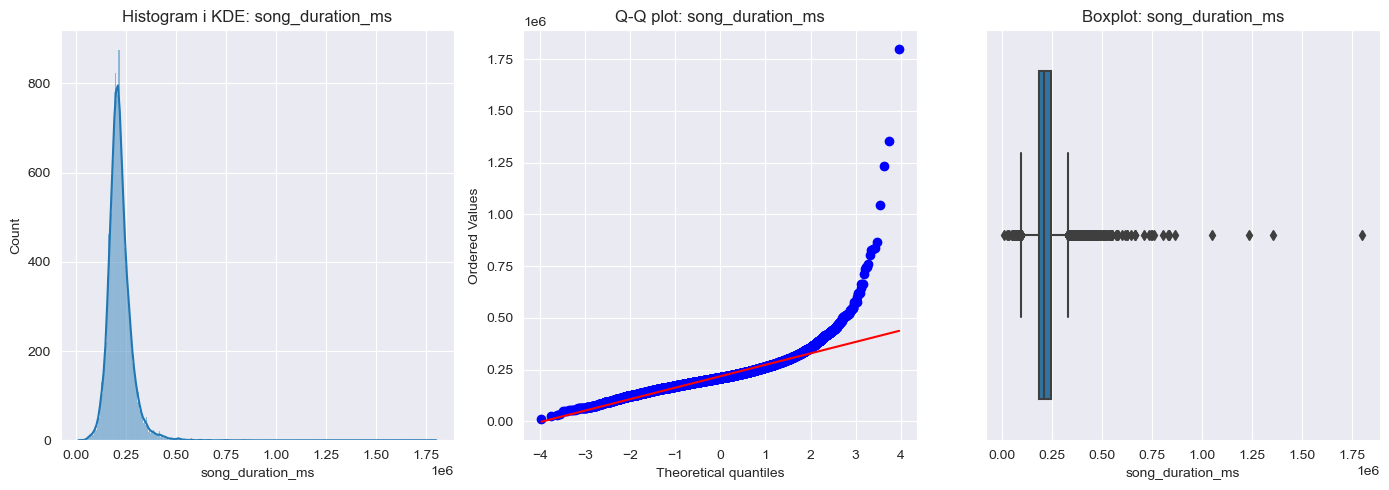

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


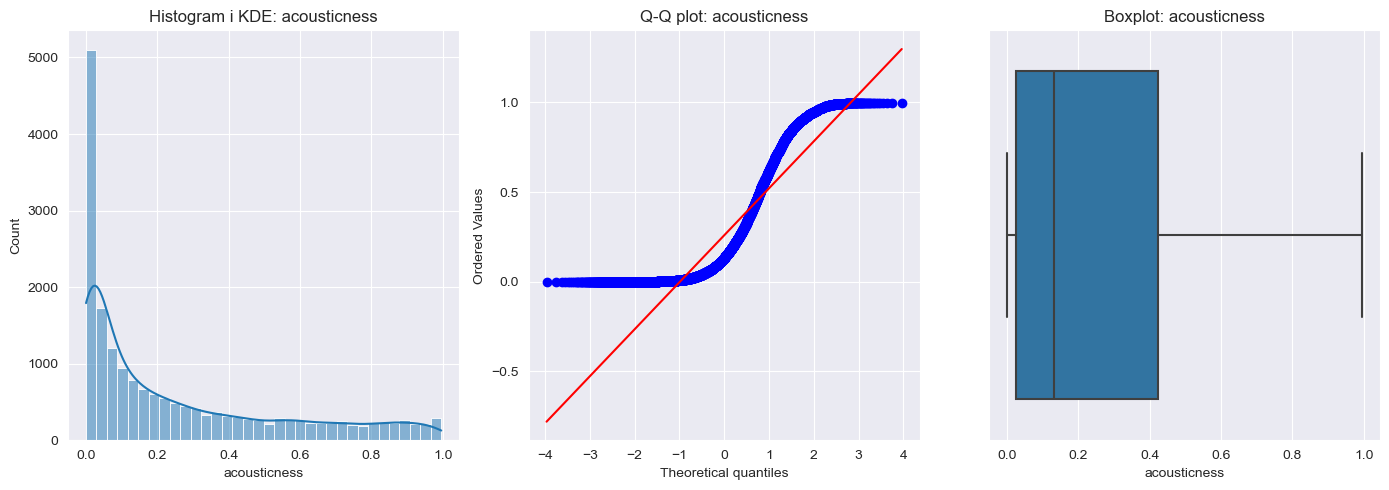

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


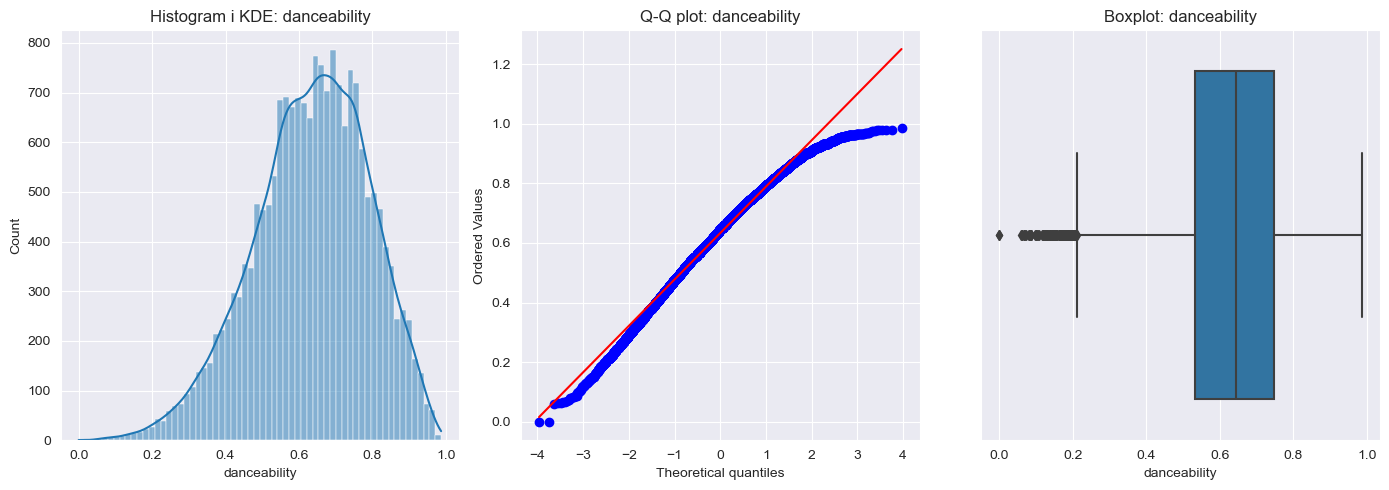

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


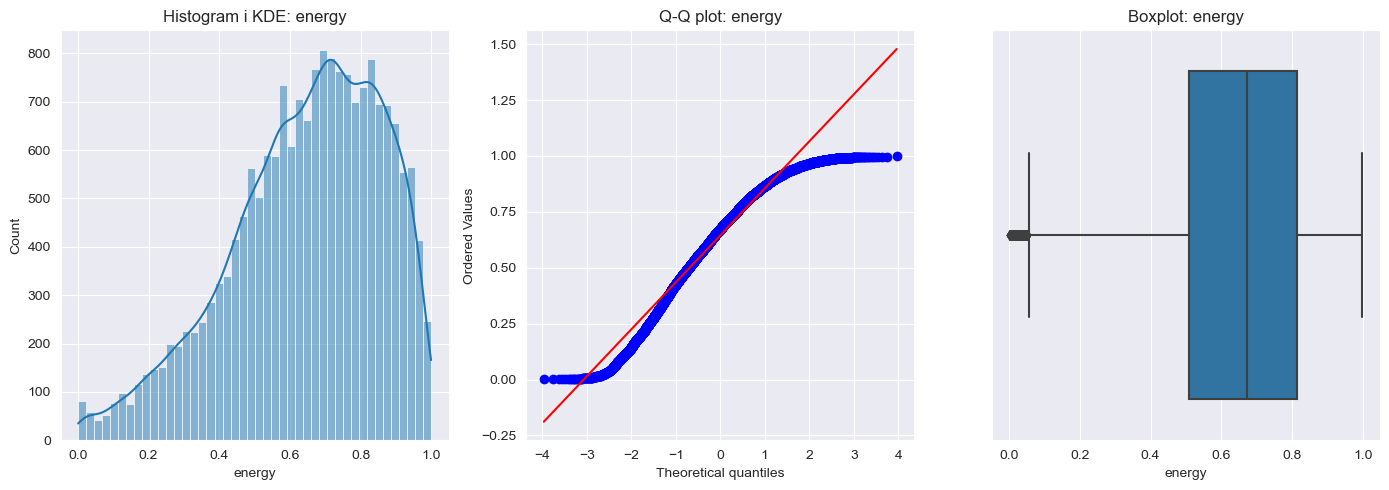

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


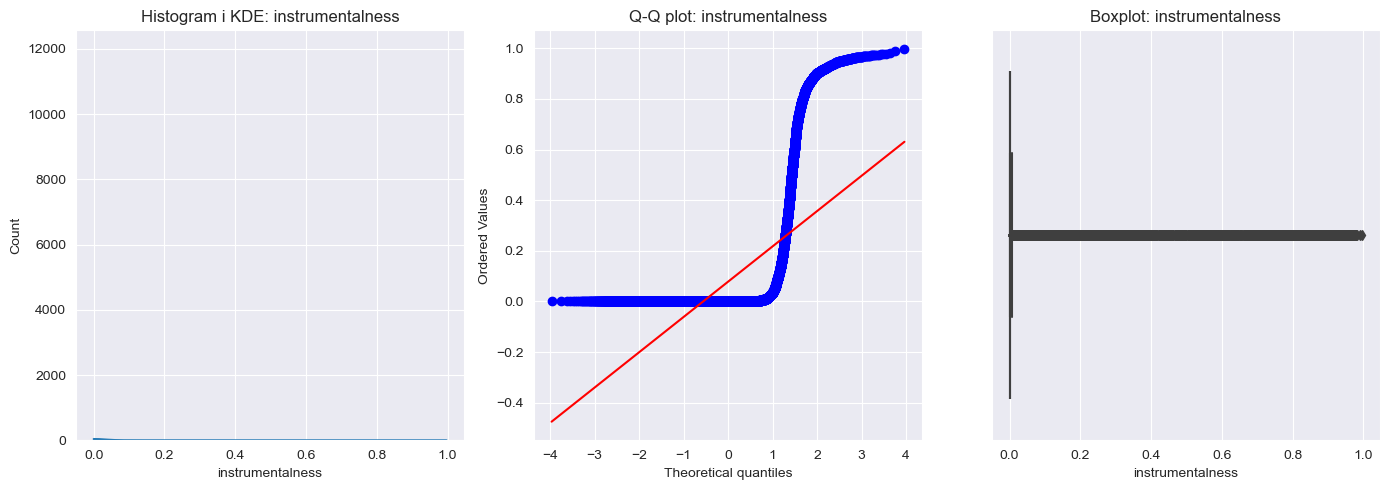

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


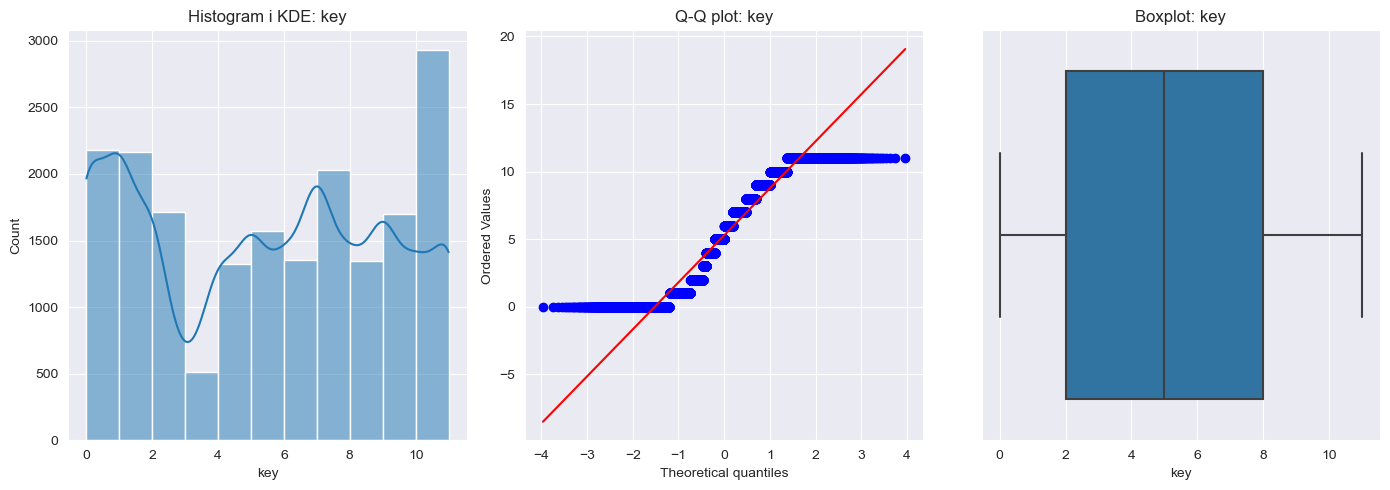

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


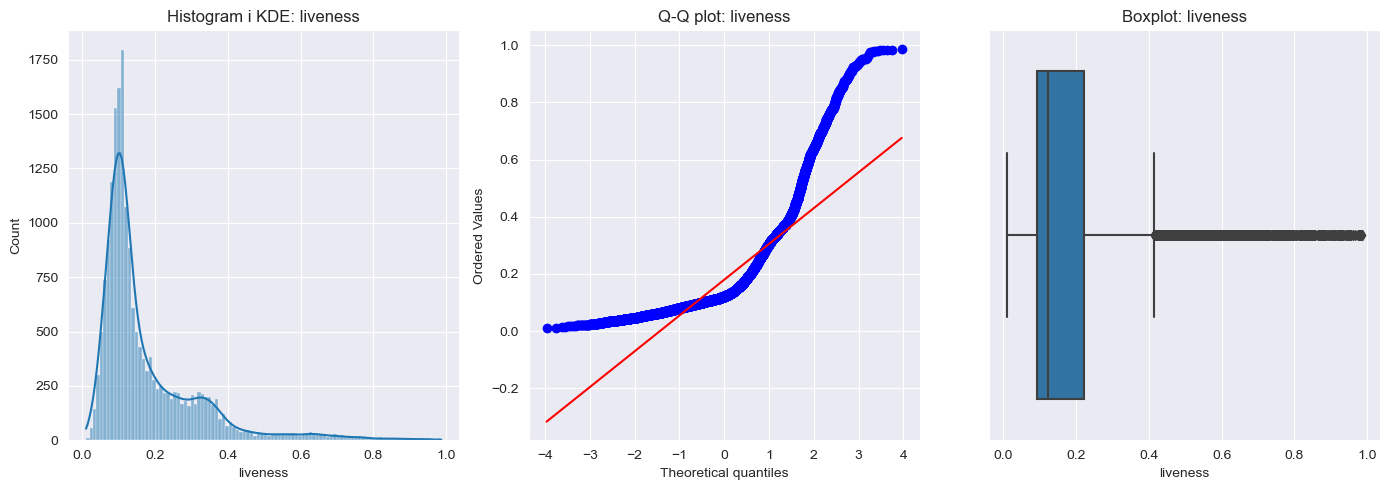

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


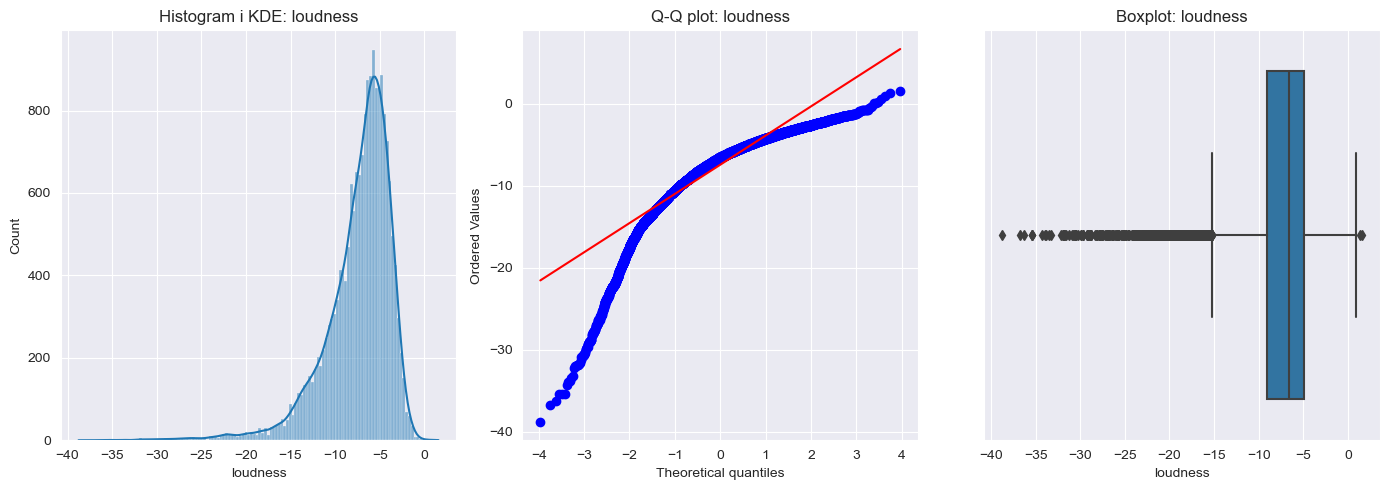

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


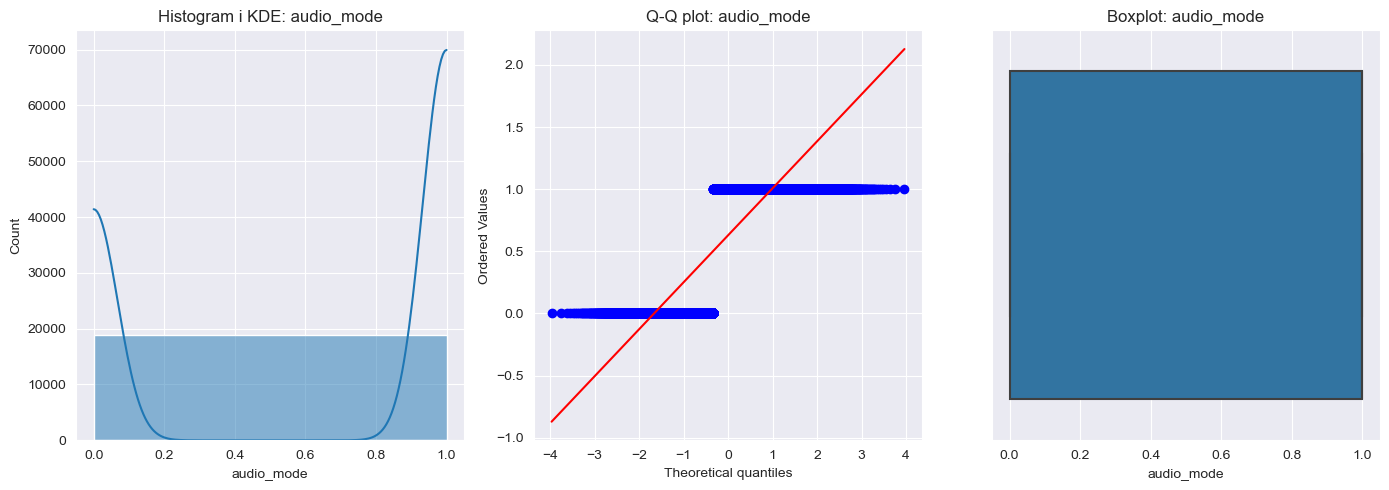

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


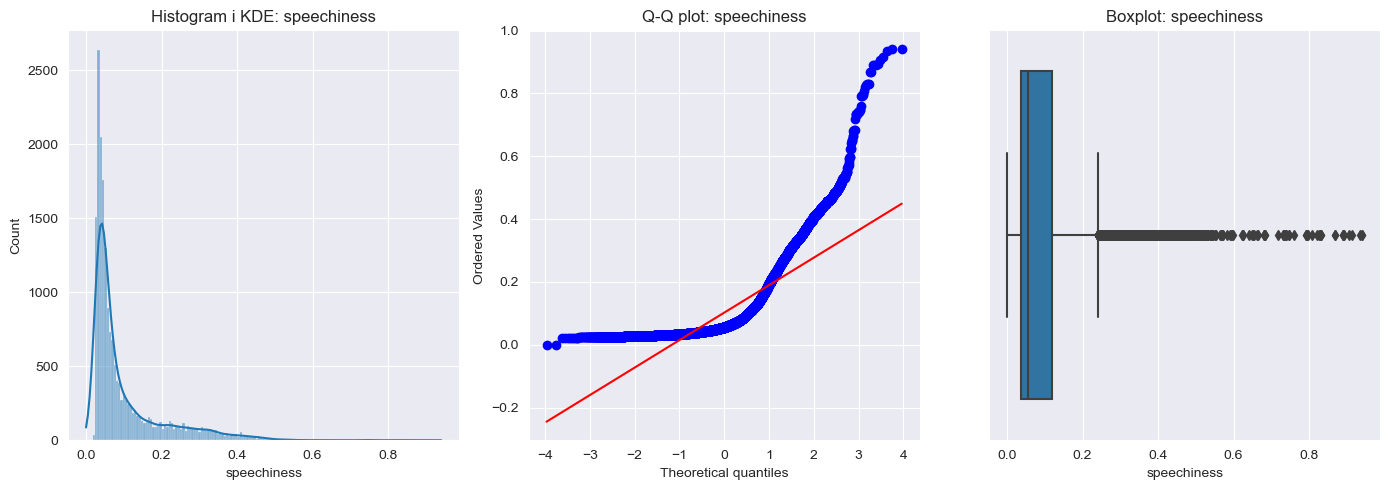

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


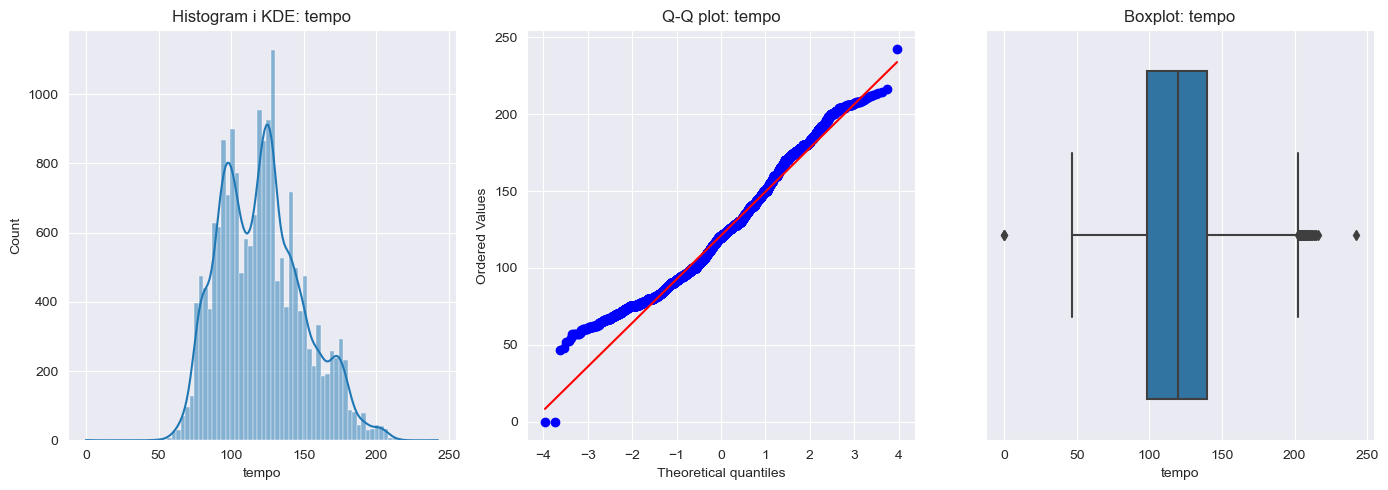

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


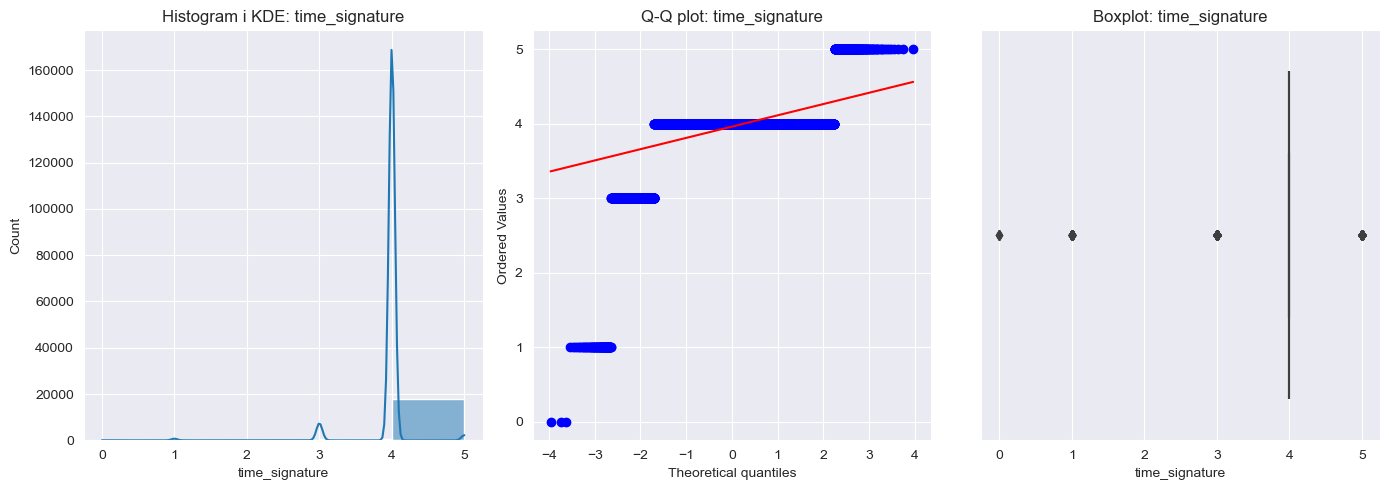

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


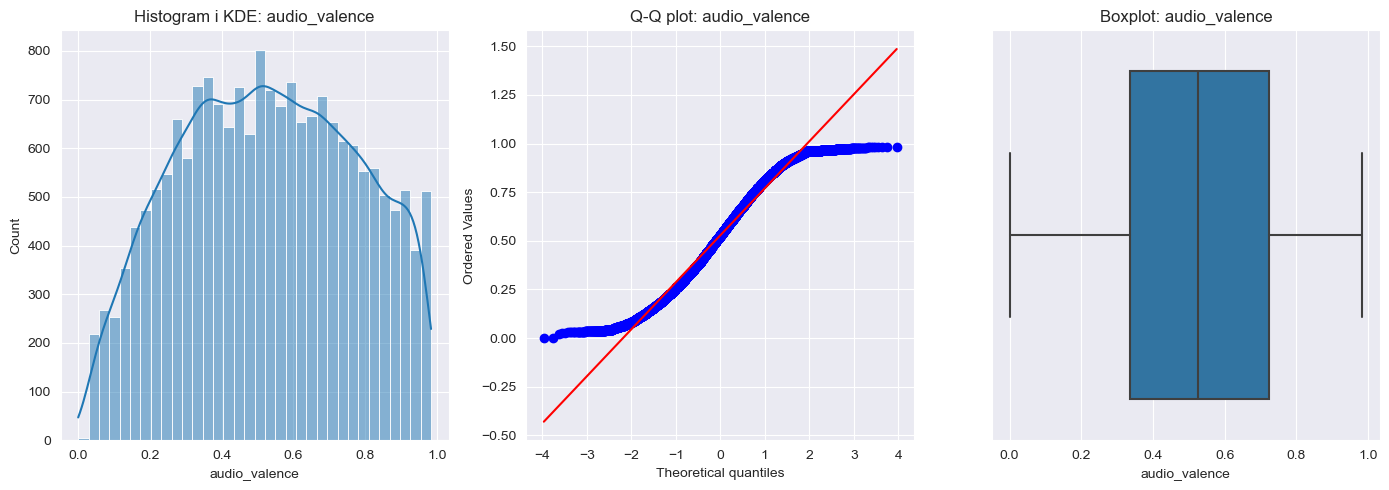

In [11]:
# 5. Wykresy
print("Histogram pokazuje liczbę obserwacji w przedziałach wartości. KDE (linia) estymuje rozkład prawdopodobieństwa.")
print("Q-Q plot porównuje kwantyle danych do kwantyli rozkładu normalnego. Jeśli punkty układają się wzdłuż prostej → dane mają rozkład zbliżony do normalnego.")
print("Boxplot - Mediana (środkowa linia), Rozstęp międzykwartylowy (IQR) (pudełko),Wartości odstające (kropki poza wąsami).\n")

for col in numeric_cols:
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram i KDE: {col}')

    plt.subplot(1, 3, 2)
    stats.probplot(data[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q plot: {col}')

    plt.subplot(1, 3, 3)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot: {col}')

    plt.tight_layout()
    plt.show()

In [12]:
# 6. Test normalności
from scipy.stats import normaltest

normality_results = {}
for col in numeric_cols:
    stat, p = normaltest(data[col].dropna())
    normality_results[col] = (stat, p)

normality_df = pd.DataFrame(normality_results, index=["statystyka", "p-wartość"]).T
display(normality_df)

print("Jak widać p<0.05 więc dane nie mają rozkładu normalnego.")

statystyka      p-wartość
song_popularity      733.577687  5.077259e-160
song_duration_ms   15301.750221   0.000000e+00
acousticness        2477.200054   0.000000e+00
danceability         453.683117   3.047634e-99
energy              1047.297394  3.821734e-228
instrumentalness   11217.629271   0.000000e+00
key               101307.927801   0.000000e+00
liveness            8533.848559   0.000000e+00
loudness            7842.409914   0.000000e+00
audio_mode         80539.155624   0.000000e+00
speechiness         8901.039173   0.000000e+00
tempo                610.460610  2.755261e-133
time_signature     19266.571320   0.000000e+00
audio_valence       3833.366178   0.000000e+00

Jak widać p<0.05 więc dane nie mają rozkładu normalnego.


In [13]:
# 7. Testy dla średniej (t-test) i wariancji
mu_0 = 50
alpha = 0.05
mean_test = stats.ttest_1samp(data["song_popularity"].dropna(), popmean=mu_0)
var_test_stat = (n - 1) * std**2 / mu_0**2
p_val_var = 2 * min(chi2.cdf(var_test_stat, df=n-1), 1 - chi2.cdf(var_test_stat, df=n-1))

print(f"Test dla średniej (H0: µ={mu_0}): stat={mean_test.statistic}, p={mean_test.pvalue}")
print(f"Test dla wariancji (H0: σ²={mu_0**2}): stat={var_test_stat}, p={p_val_var}")

print("Średnia w danych jest statystycznie różna od 50. Tak niska p-wartość oznacza, że prawdopodobieństwo otrzymania takiego wyniku, jeśli H₀ byłaby prawdziwa, jest znikome.")
print("Statystyka testowa bardzo duża: 3615.056. p-wartość = 0.0 – interpretowana jako < 1e-16, co znów oznacza prawie zerową szansę, że taki wynik wystąpiłby przy H₀.")
print("Odrzucamy H₀.")


Test dla średniej (H0: µ=50): stat=18.744345986096672, p=1.0964098402124035e-77
Test dla wariancji (H0: σ²=2500): stat=3615.0559028617336, p=0.0
Średnia w danych jest statystycznie różna od 50. Tak niska p-wartość oznacza, że prawdopodobieństwo otrzymania takiego wyniku, jeśli H₀ byłaby prawdziwa, jest znikome.
Statystyka testowa bardzo duża: 3615.056. p-wartość = 0.0 – interpretowana jako < 1e-16, co znów oznacza prawie zerową szansę, że taki wynik wystąpiłby przy H₀.
Odrzucamy H₀.


KDE pokazuje jak wygląda rozkład danych — ale bez zakładania konkretnego rozkładu (np. normalnego)
KDE umieszcza małą funkcję gładką (jądro – np. krzywą Gaussa) na każdym punkcie danych. Sumuje te funkcje → powstaje gładka krzywa, która przybliża rozkład danych.


C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


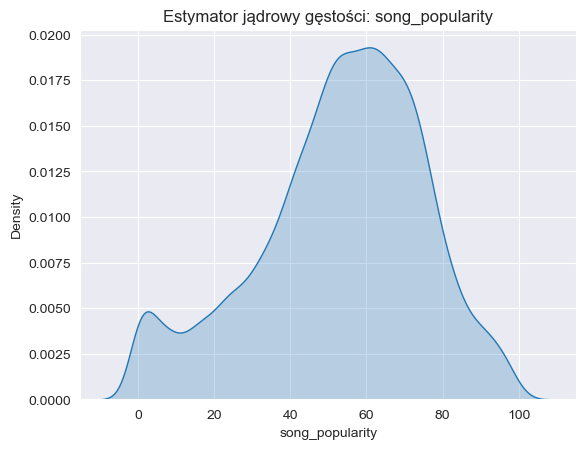

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


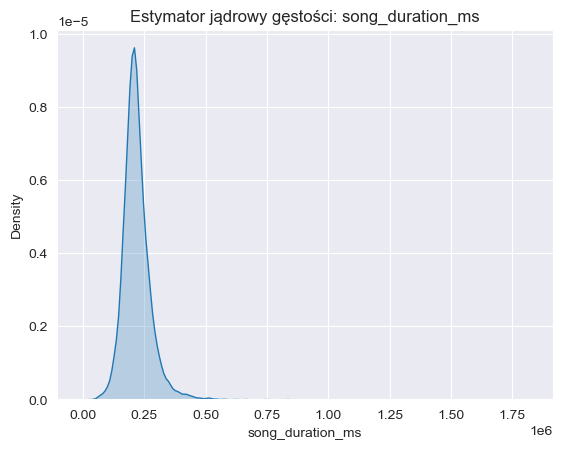

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


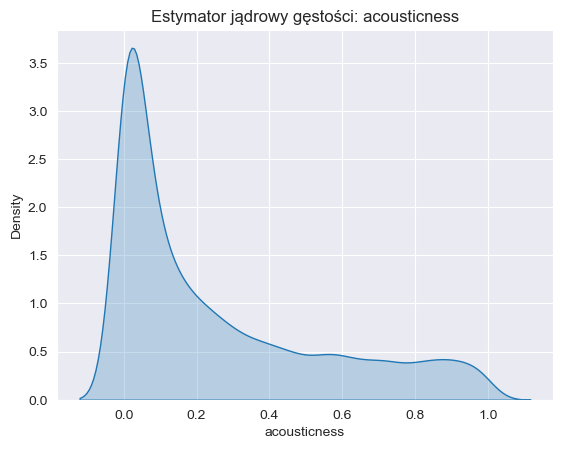

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


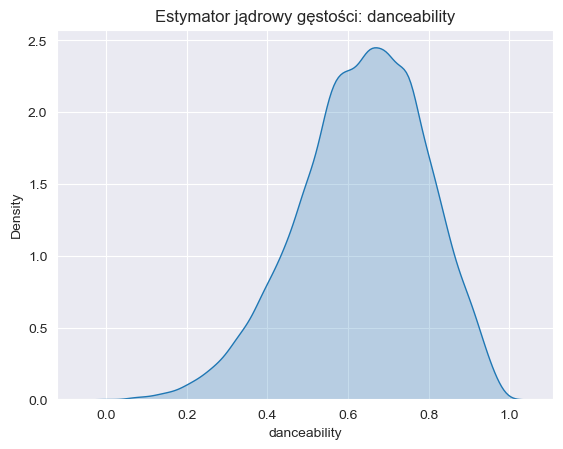

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


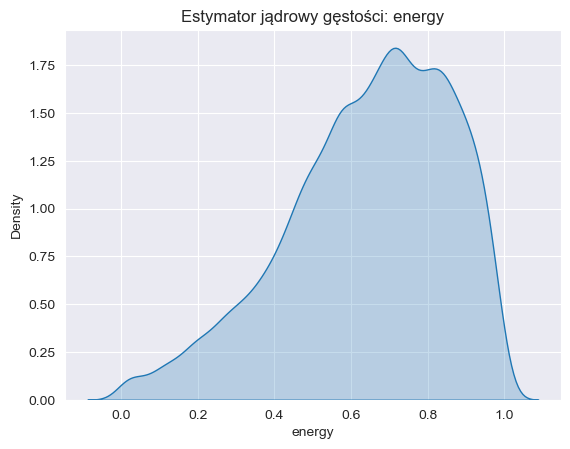

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


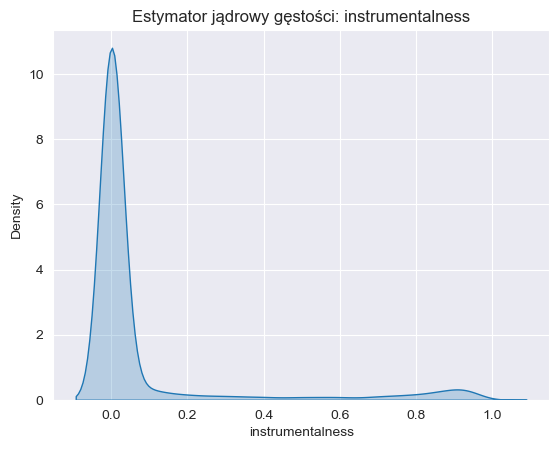

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


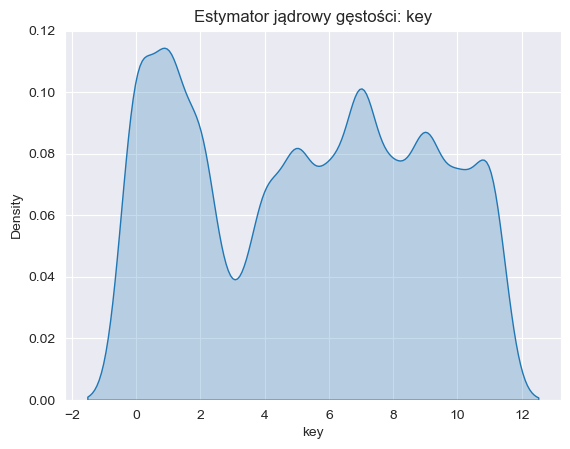

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


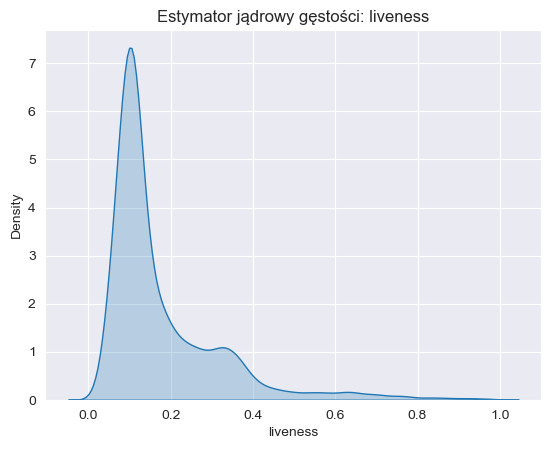

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


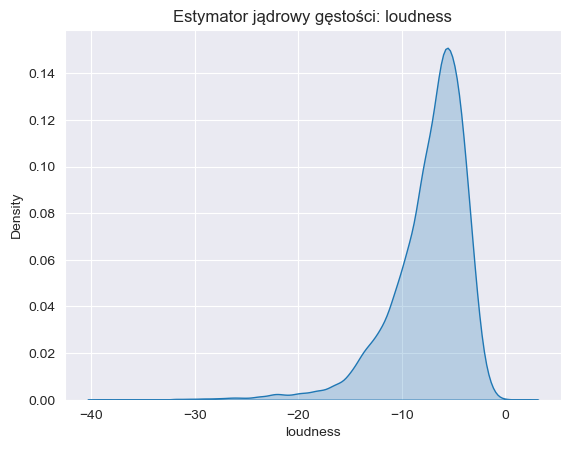

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


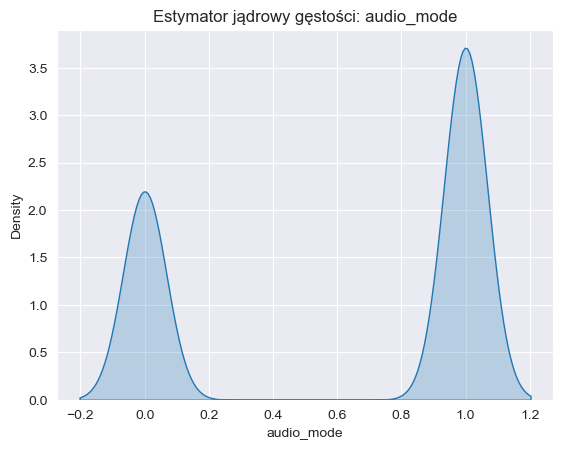

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


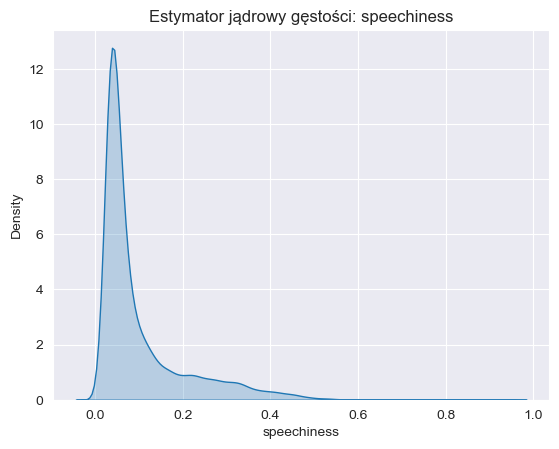

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


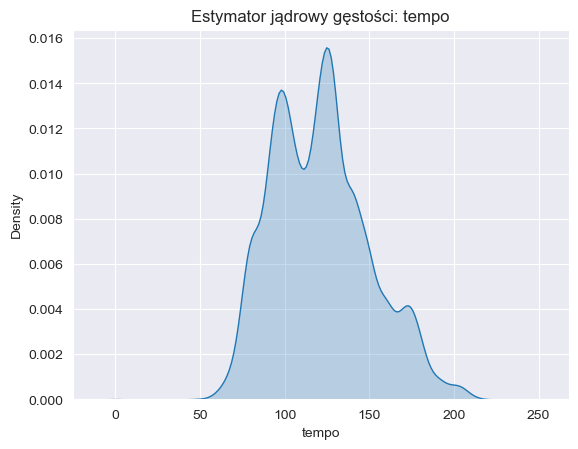

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


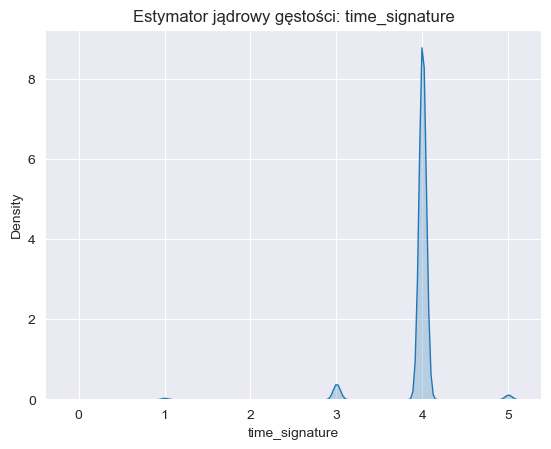

C:\Users\pawel\.conda\envs\tum_py313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


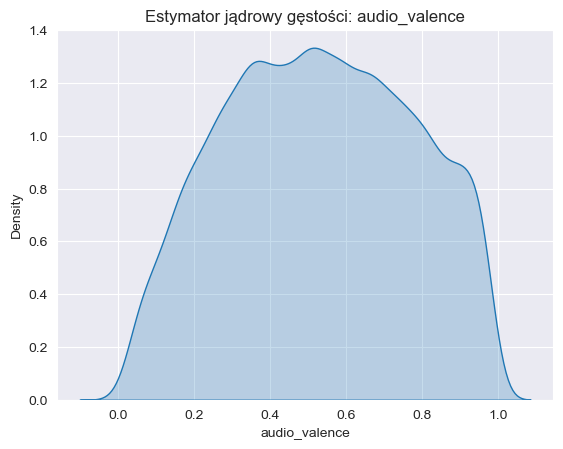

In [14]:
# 8. Estymator jądrowy gęstości
data = data.replace([np.inf, -np.inf], np.nan)
print("KDE pokazuje jak wygląda rozkład danych — ale bez zakładania konkretnego rozkładu (np. normalnego)")
print("KDE umieszcza małą funkcję gładką (jądro – np. krzywą Gaussa) na każdym punkcie danych. Sumuje te funkcje → powstaje gładka krzywa, która przybliża rozkład danych.")

for col in numeric_cols:
    sns.kdeplot(data[col].dropna(), fill=True)
    plt.title(f'Estymator jądrowy gęstości: {col}')
    plt.xlabel(col)
    plt.show()